# Semi-Monocoque Theory

In [18]:
from pint import UnitRegistry
import sympy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
from IPython.display import display

Import **Section** class, which contains all calculations

In [19]:
from Section import Section

Initialization of **sympy** symbolic tool and **pint** for dimension analysis (not really implemented rn as not directly compatible with sympy)

In [20]:
ureg = UnitRegistry()
sympy.init_printing()

Define **sympy** parameters used for geometric description of sections

In [21]:
A, A0, t, t0, a, b, h, L = sympy.symbols('A A_0 t t_0 a b h L', positive=True)

We also define numerical values for each **symbol** in order to plot scaled section and perform calculations

In [22]:
values = [(A, 150 * ureg.millimeter**2),(A0, 250  * ureg.millimeter**2),(a, 80 * ureg.millimeter), \
          (b, 20 * ureg.millimeter),(h, 35 * ureg.millimeter),(L, 2000 * ureg.millimeter)]
datav = [(v[0],v[1].magnitude) for v in values]

# Triangular section

Define graph describing the section:

1) **stringers** are **nodes** with parameters:
- **x** coordinate
- **y** coordinate
- **Area**

2) **panels** are **oriented edges** with parameters:
- **thickness**
- **lenght** which is automatically calculated

In [23]:
stringers = {1:[(sympy.Integer(0),h),A],
             2:[(sympy.Integer(0),sympy.Integer(0)),A],
             3:[(a,sympy.Integer(0)),A]}

panels = {(1,2):t,
          (2,3):t,
          (3,1):t}

Define section and perform first calculations

In [24]:
S1 = Section(stringers, panels)

In [25]:
S1.cycles

## Plot of **S1** section in original reference frame

Define a dictionary of coordinates used by **Networkx** to plot section as a Directed graph.
Note that arrows are actually just thicker stubs

In [26]:
start_pos={ii: [float(S1.g.node[ii]['ip'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

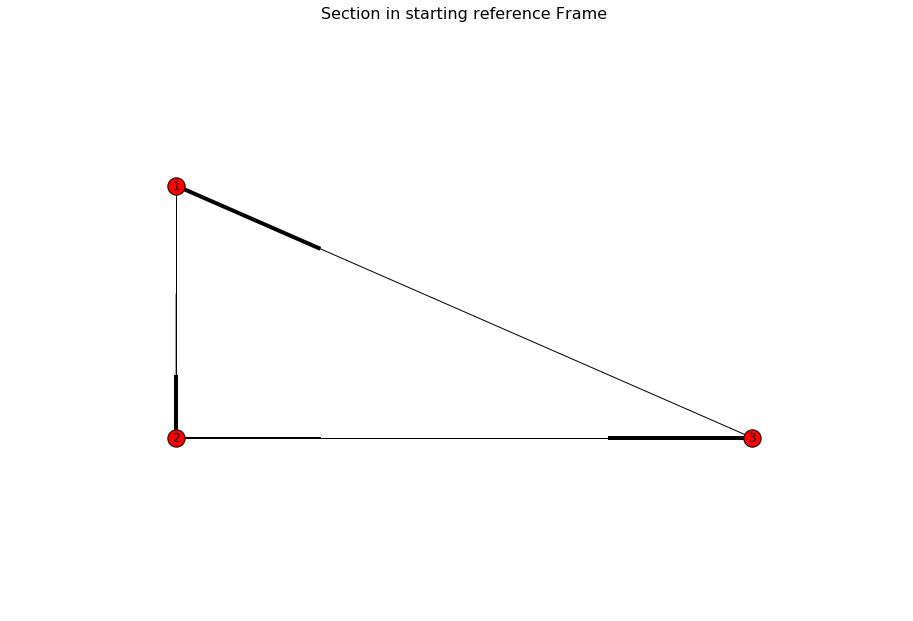

In [27]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

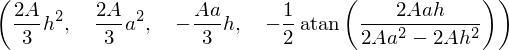

In [28]:
S1.Ixx0, S1.Iyy0, S1.Ixy0, S1.α0

## Plot of **S1** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [29]:
positions={ii: [float(S1.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

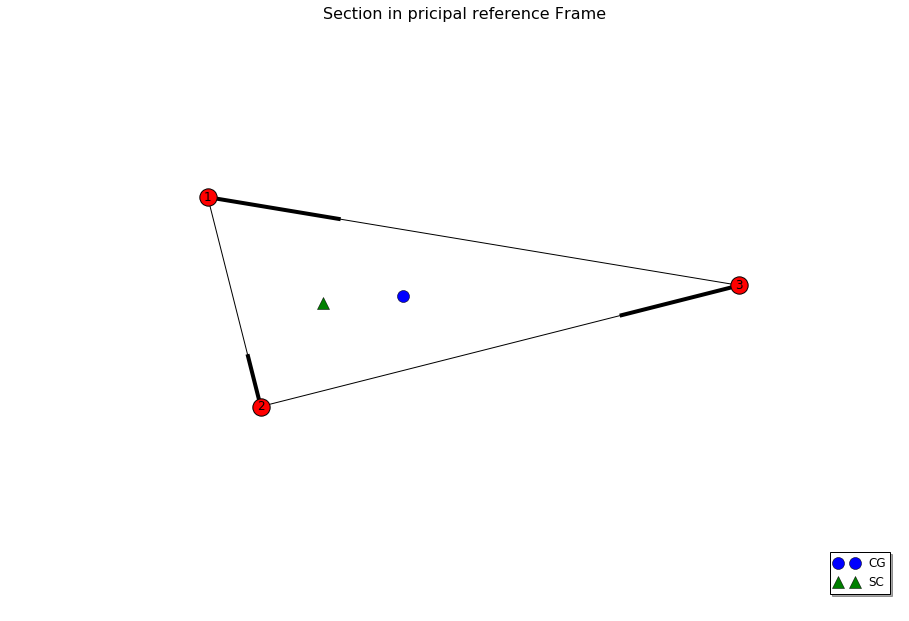

In [30]:
x_ct, y_ct = S1.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

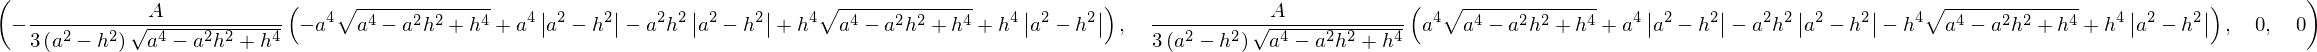

In [31]:
sympy.simplify(S1.Ixx), sympy.simplify(S1.Iyy), sympy.simplify(S1.Ixy), sympy.simplify(S1.θ)

## **Shear center** expression 

Expressions can be messy, so we evaluate them to numerical values

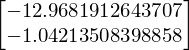

In [32]:
sympy.N(S1.ct.subs(datav))

## Analisys of Loads

We define some symbols

In [33]:
Tx, Ty, Nz, Mx, My, Mz, F, ry, ry, mz = sympy.symbols('T_x T_y N_z M_x M_y M_z F r_y r_x m_z')

In [34]:
S1.set_loads(_Tx=0, _Ty=Ty, _Nz=0, _Mx=Mx, _My=0, _Mz=0)
#S1.compute_stringer_actions()
#S1.compute_panel_fluxes();

**Axial Loads**

In [35]:
#S1.N

**Panel Fluxes**

In [36]:
#S1.q

**Example 2**: _twisting moment_ in **z** direction

In [37]:
S1.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=0, _My=0, _Mz=Mz)
S1.compute_stringer_actions()
S1.compute_panel_fluxes();

**Axial Loads**

In [38]:
S1.N

**Panel Fluxes**
evaluated to numerical values

In [39]:
{k:sympy.N(S1.q[k].subs(datav)) for k in S1.q }

## Torsional moment of Inertia

In [40]:
S1.compute_Jt()

In [41]:
sympy.N(S1.Jt.subs(datav))